In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
%matplotlib inline

In [2]:
epilson=lambda Z,Er:11.5*Er*Z**(-7/3)
k=lambda Z,A:0.133*(Z**(2/3))*(A**(-1/2))
ge=lambda e:3*e**(0.15)+0.7*e**(0.6)+e
LEr=lambda k,g:(k*g)/(1+k*g)
Q=lambda Er,LEr,W:(Er*LEr)/W


def QCharge(Z,A,Er,W):
    e=1.6e-19*1000
    QCharge=[]
    W=W/1000 #Converting to keV
    for i in Er:
        fepil=epilson(Z,i)
        fk=k(Z,A)
        fge=ge(fepil)
        fLEr=LEr(fk,fge)
        fQ=Q(i,fLEr,W)
        QCharge.append(fQ)
    return QCharge

In [3]:
Er=np.arange(1e-3,10,1e-3)


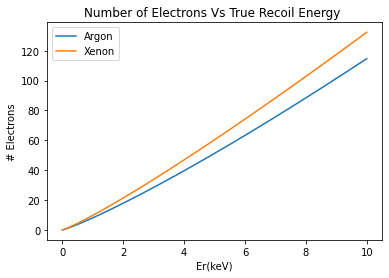

In [53]:

#For Argon
War=23.6  #eV
Aar=40    # g
Zar=18

#For Xenon
Wxe=15.6  #eV
Axe=131.293    # g
Zxe=54

QArgon=QCharge(Zar,Aar,Er,War)
QZxe=QCharge(Zxe,Axe,Er,Wxe)

plt.figure()
plt.title("Number of Electrons Vs True Recoil Energy ")
plt.plot(Er,QArgon,alpha=1,
            label="Argon")
plt.plot(Er,QZxe,alpha=1,label="Xenon")
ax=plt.gca()
#ax.set_yscale('log')
#plt.loglog()
plt.legend(loc='upper left')
plt.ylabel('# Electrons')
plt.xlabel("Er(keV)")
plt.show()



In [5]:

####################################  For Blargon Question  #####################################################

In [ ]:
RecombFrac=lambda f0,E,x:f0*np.exp(-E/x)
Photons=lambda Ni,r:Ni*(r+2/3)
charge=lambda Ni,r:Ni*(1-r)

In [6]:
Efield=np.arange(0,6000,1)
IperMev=20000
AlphaLight=[]
MuonLight=[]
AlphaCharge=[]
MuonCharge=[]

for i in Efield:
    r_alpha=RecombFrac(0.8,i,500)
    r_muon=RecombFrac(0.3,i,500)
    Nsc_Alpha=Photons(IperMev,r_alpha)
    Nsc_Muon=Photons(IperMev,r_muon)
    AlphaLight.append(Nsc_Alpha)
    MuonLight.append(Nsc_Muon)
    AlphaCharge.append(charge(IperMev,r_alpha))
    MuonCharge.append(charge(IperMev,r_muon))


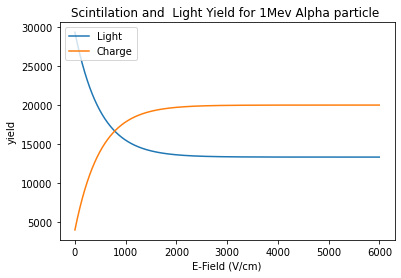

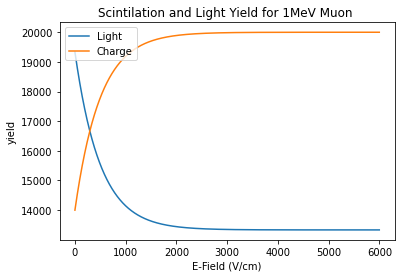

In [7]:
plt.figure()
plt.title("Scintilation and  Light Yield for 1Mev Alpha particle ")
plt.plot(Efield,AlphaLight,alpha=1,label="Light")

plt.plot(Efield,AlphaCharge,alpha=1,label="Charge")

plt.legend(loc='upper left')
plt.ylabel('yield')
plt.xlabel("E-Field (V/cm)")
plt.show()

    
plt.figure()
plt.title("Scintilation and Light Yield for 1MeV Muon ")
    
plt.plot(Efield,MuonLight,alpha=1,label="Light")
plt.plot(Efield,MuonCharge,alpha=1,label="Charge")
ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='upper left')
plt.ylabel('yield')
plt.xlabel("E-Field (V/cm)")
plt.show()

In [8]:
Pulse=lambda t,T:(1/T)*np.exp(-t/T)


In [35]:
Pulse_0=[]
Pulse_500=[]
Pulse_6k=[]
tripT=2000 #ns
singlT=10 #ns
IperMev=20000*5.4
time=np.arange(0,2000,1)

#from Recombination
#  3/5*TotalPhoton

# from Excitation
#2/5*Total Photon 

for i in time:
    SinglePulse=Pulse(i,singlT)
    TriplePulse=Pulse(i,tripT)
    
    if (i==0):
        SinglePulse=0
        TriplePulse=0
    #for 0 E-field
    r_Alpha=RecombFrac(0.8,0,500)
    Nsc_Alpha=Photons(IperMev,r_Alpha)
    
    Pulse_Recombination=0.5*(3/5)*Nsc_Alpha*SinglePulse+0.5*(3/5)*Nsc_Alpha*TriplePulse#For Recombination
    Pulse_exit=0.3*(2/5)*Nsc_Alpha*SinglePulse+0.7*(2/5)*Nsc_Alpha*TriplePulse    #for Excitations

    Pulse_0.append(Pulse_Recombination+Pulse_exit) #total Pulse
    
    
    #500 V/cm
    r_Alpha=RecombFrac(0.8,500,500)
    Nsc_Alpha=Photons(IperMev,r_Alpha)
    Pulse_Recombination=0.5*(3/5)*Nsc_Alpha*Pulse(i,singlT)+0.5*(3/5)*Nsc_Alpha*TriplePulse#For Recombination
    Pulse_exit=0.3*(2/5)*Nsc_Alpha*SinglePulse+0.7*(2/5)*Nsc_Alpha*TriplePulse     #for Excitations

    Pulse_500.append(Pulse_Recombination+Pulse_exit) #total Pulse
    
    #6kV/cm
    r_Alpha=RecombFrac(0.8,6000,500)
    Nsc_Alpha=Photons(IperMev,r_Alpha)
    Pulse_Recombination=0.5*(3/5)*Nsc_Alpha*SinglePulse+0.5*(3/5)*Nsc_Alpha*TriplePulse#For Recombination
    Pulse_exit=0.3*(2/5)*Nsc_Alpha*SinglePulse+0.7*(2/5)*Nsc_Alpha*TriplePulse     #for Excitations

    Pulse_6k.append(Pulse_Recombination+Pulse_exit) #total Pulse



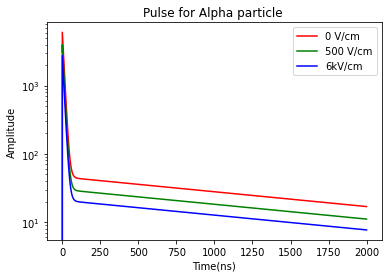

################ After normalization #############


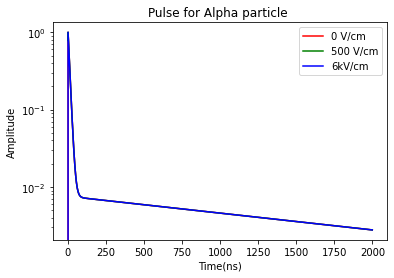

In [36]:

plt.title("Pulse for Alpha particle ")
norm = Pulse_0/max(Pulse_0)
plt.plot(time,Pulse_0,alpha=1,label="0 V/cm",color="r")
norm = Pulse_500/max(Pulse_500)
plt.plot(time,Pulse_500,alpha=1,label="500 V/cm",color="g")
norm = Pulse_6k/max(Pulse_6k)
plt.plot(time,Pulse_6k,alpha=1,label="6kV/cm",color="b")
ax=plt.gca()
#ax.set_yscale('log')
# ax.set_yscale('log')
plt.semilogy()
plt.legend(loc='upper right')
plt.ylabel('Amplitude')
plt.xlabel("Time(ns)")
plt.show()

print ("################ After normalization #############")

plt.title("Pulse for Alpha particle ")
norm = Pulse_0/max(Pulse_0)
plt.plot(time,norm,alpha=1,label="0 V/cm",color="r")
norm = Pulse_500/max(Pulse_500)
plt.plot(time,norm,alpha=1,label="500 V/cm",color="g")
norm = Pulse_6k/max(Pulse_6k)
plt.plot(time,norm,alpha=1,label="6kV/cm",color="b")
ax=plt.gca()
#ax.set_yscale('log')
# ax.set_yscale('log')
plt.semilogy()
plt.legend(loc='upper right')
plt.ylabel('Amplitude')
plt.xlabel("Time(ns)")
plt.show()

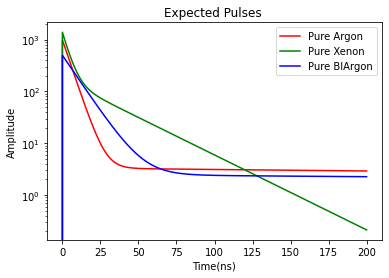

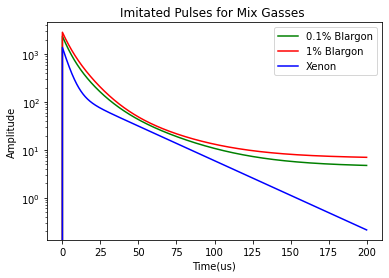

In [50]:
time=np.arange(0,200,0.1)
#For Argon
SingleTAr=5 #ns
TripletsTAr=1500 #ns

#for Xenon ns
SingleTXe=4 
TripletsTXe=30

#for Blargon
SingleTBl=10 
TripletsTBl=2000

#from Recombination
#  3/5*TotalPhoton

# from Excitation
#2/5*Total Photon 
PulseArgonBlArgon=[]
PulseArgonBlXenon=[]
PulseArgonBlArgon1=[]
PulseArgonBlXenon1=[]
PulseArgon=[]
PulseXenon=[]
PulseBlArgon=[]
arbPhotons=10000

for i in time:
    if(i==0):
            PulseArgon.append(0) 
            PulseXenon.append(0)
            PulseBlArgon.append(0)
            PulseArgonBlArgon.append(0)
            PulseArgonBlXenon.append(0)
            PulseArgonBlArgon1.append(0)
            PulseArgonBlXenon1.append(0)
    else:
            #Non Mix
            ArgonPulse=0.5*(Pulse(i,SingleTAr)+Pulse(i,TripletsTAr))
            XenonPulse=0.5*(Pulse(i,SingleTXe)+Pulse(i,TripletsTXe))
            BlArgonPulse=0.5*(Pulse(i,SingleTBl)+Pulse(i,TripletsTBl))

            PulseArgon.append(ArgonPulse*arbPhotons) 
            PulseXenon.append(XenonPulse*arbPhotons)
            PulseBlArgon.append(BlArgonPulse*arbPhotons)
            
            #For 0.1% &
            PulseArgonBlArgon.append(arbPhotons*(ArgonPulse+BlArgonPulse+BlArgonPulse))
            PulseArgonBlXenon.append(arbPhotons*(XenonPulse+BlArgonPulse+BlArgonPulse))
            
            #for 1%
            PulseArgonBlArgon1.append(arbPhotons*(ArgonPulse+BlArgonPulse+BlArgonPulse+BlArgonPulse))
            PulseArgonBlXenon1.append(arbPhotons*(XenonPulse+BlArgonPulse+BlArgonPulse+BlArgonPulse))
        

plt.title("Expected Pulses ")
plt.plot(time,PulseArgon,alpha=1,label="Pure Argon",color="r")
plt.plot(time,PulseXenon,alpha=1,label="Pure Xenon",color="g")
plt.plot(time,PulseBlArgon,alpha=1,label="Pure BlArgon",color="b")
ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.semilogy()

plt.legend(loc='upper right')
plt.ylabel('Amplitude')
plt.xlabel("Time(ns)")
plt.show()    

plt.title("Imitated Pulses for Mix Gasses ")
plt.plot(time,PulseArgonBlXenon,alpha=1,label="0.1% Blargon",color="g")
plt.plot(time,PulseArgonBlXenon1,alpha=1,label="1% Blargon",color="r")
plt.plot(time,PulseXenon,alpha=1,label="Xenon",color="b")

ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.semilogy()

plt.legend(loc='upper right')
plt.ylabel('Amplitude')
plt.xlabel("Time(us)")
plt.show()    